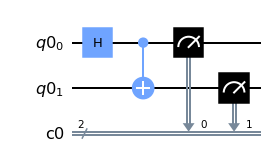

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.draw()
%matplotlib inline
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

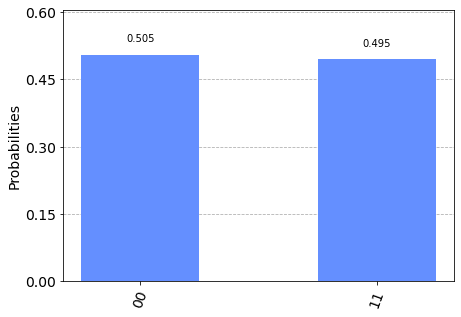

In [3]:
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

In [3]:
from qiskit.providers.ibmq import least_busy

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
num_qubits = 2

possible_devices = provider.backends(filters=lambda x:
                                    x.configuration().n_qubits >= num_qubits
                                    and
                                    x.configuration().simulator == False)

qcomp = least_busy(possible_devices)
print(qcomp)

/home/dany98/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


ibmq_belem


In [8]:
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor

%qiskit_job_watcher
job = execute(circuit, backend)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

NameError: name 'backend' is not defined

In [2]:
result = job.result()
plot_histogram(result.get_counts(circuit))

NameError: name 'job' is not defined

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

dev = qml.device('default.qubit', wires=2)

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, [0])
qc.rx(theta, [0])
qc.cx(0, 1)

@qml.qnode(dev)
def quantum_circuit_with_loaded_subcircuit(x):
    qml.from_qiskit(qc)({theta: x})
    return qml.expval(qml.PauliZ(0))

angle = np.pi/2
result = quantum_circuit_with_loaded_subcircuit(angle)